In [ ]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and getting to know the data

In [ ]:
df = pd.read_csv('howpop_train.csv')

In [ ]:
df.shape

(134137, 17)

In [ ]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Let's get rid of the variables whose names end with `_lognorm`. Select them with `filter()` and drop them:

In [ ]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns),
        axis = 1,       # axis = 1: columns
        inplace = True) # eliminates the need to save the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [ ]:
df.describe(include = ['object', 'bool']).T # binary and categorical variables

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/252529/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [ ]:
# setting the appearance of charts in seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5,
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

The column published (publish time) contains rows. So that we can work with this data as with the date / time of publication, we will cast it to the datetime type:

In [ ]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Let's create some columns based on the publication time data:

In [ ]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [ ]:
df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,NaN,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0,2016,10,1,21
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0,2016,10,1,22
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0,2016,10,1,23
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,NaN,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0,2016,10,1,23


## 1. Which month (and year) had the most posts?

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [ ]:
publication_df = df[(df.year == 2015)]

'март 2015'

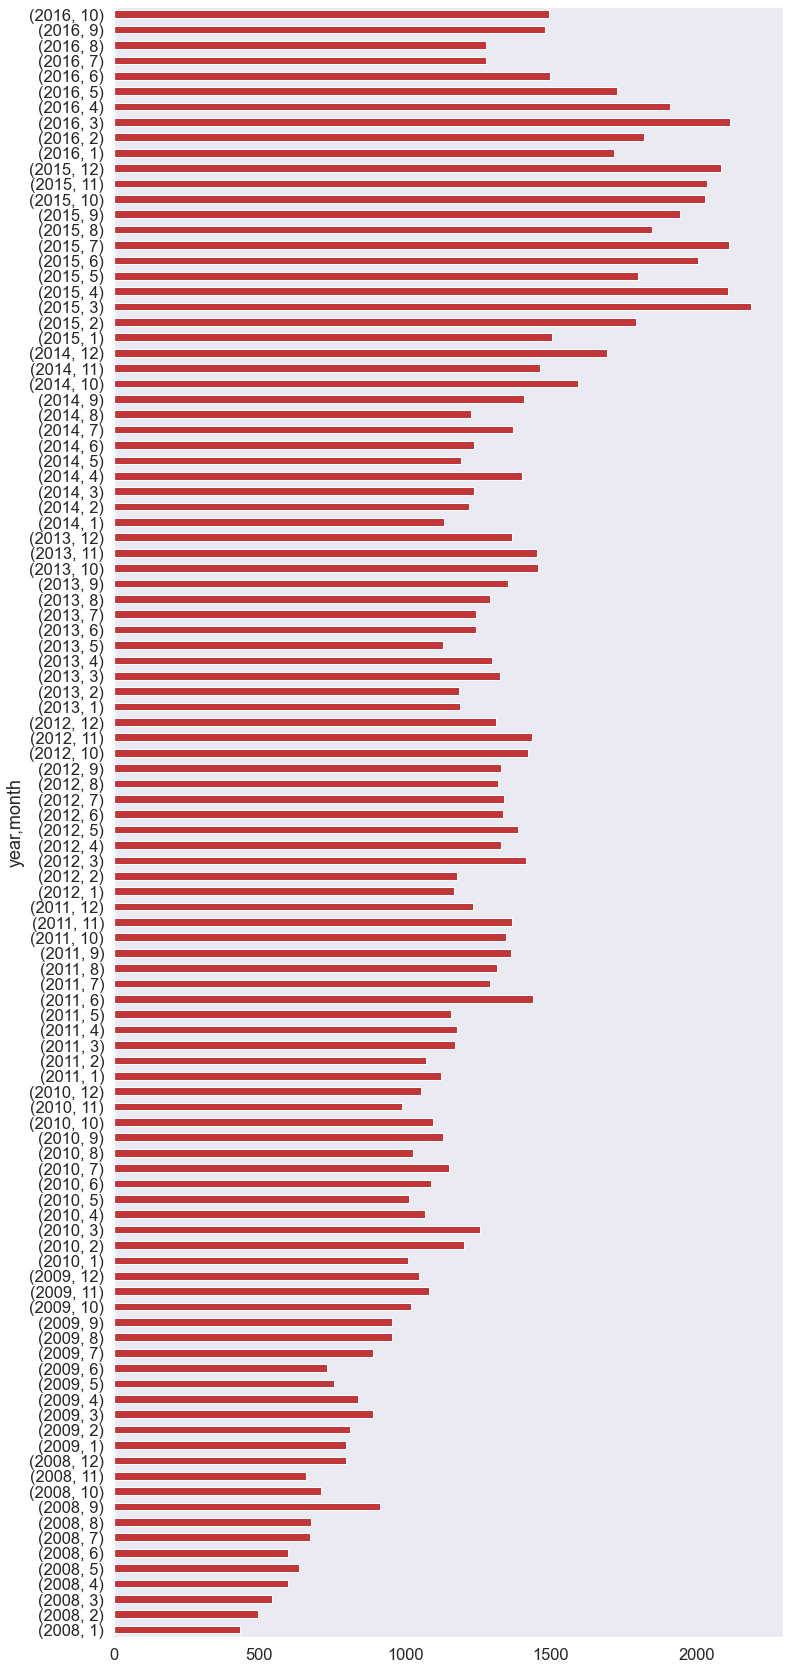

In [ ]:
publication_df = df.groupby(['year', 'month']).url.count().plot(kind = 'barh', figsize = (12,30))


'march 2015'

## 2. Analysis of publications in the month from the previous question

<AxesSubplot:xlabel='day', ylabel='count'>

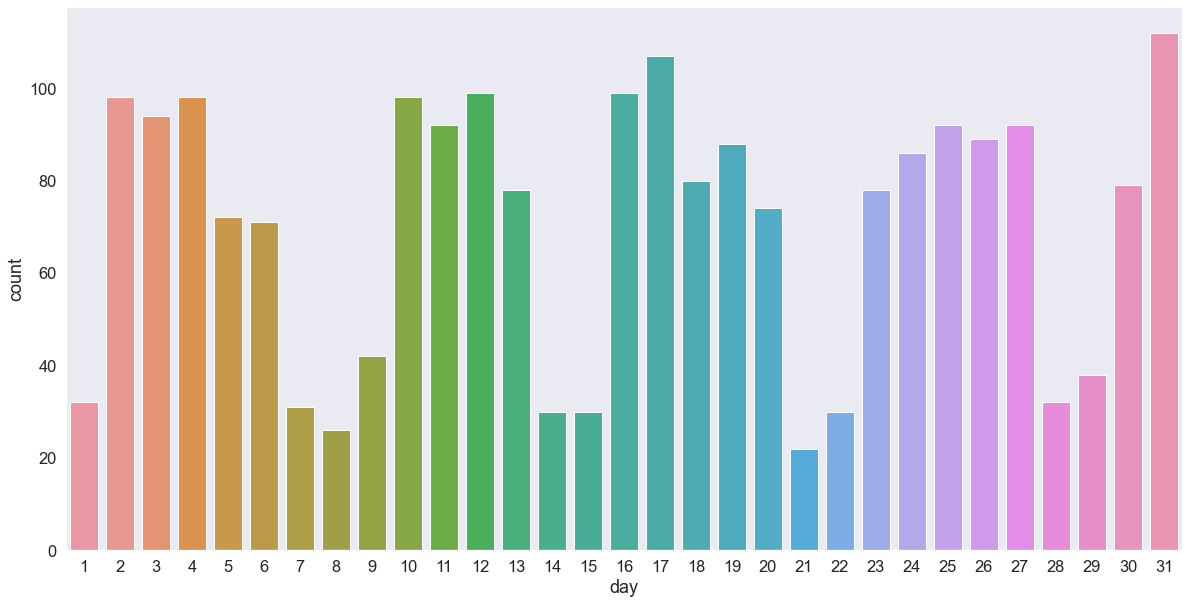

In [ ]:
df['day'] = [d.day for d in df.published]
df1=df[(df['year']==2015) & (df['month']==3)]

'days are not allocated'

<AxesSubplot:xlabel='day', ylabel='count'>

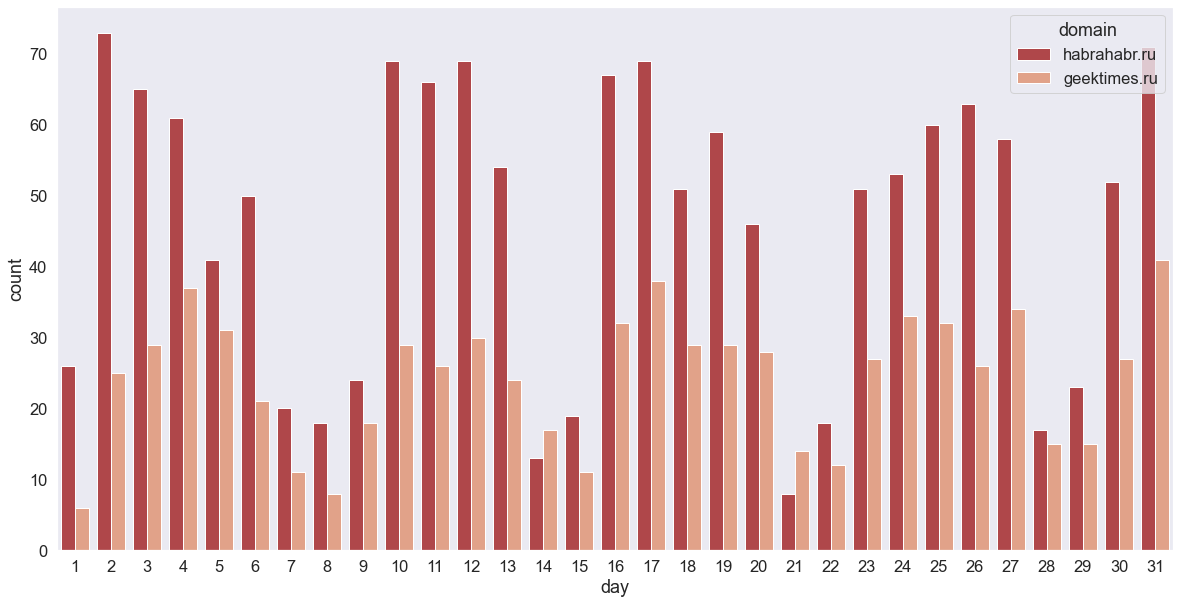

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x='day', hue = 'domain', data=df1)

'almost all days more articles were published'

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

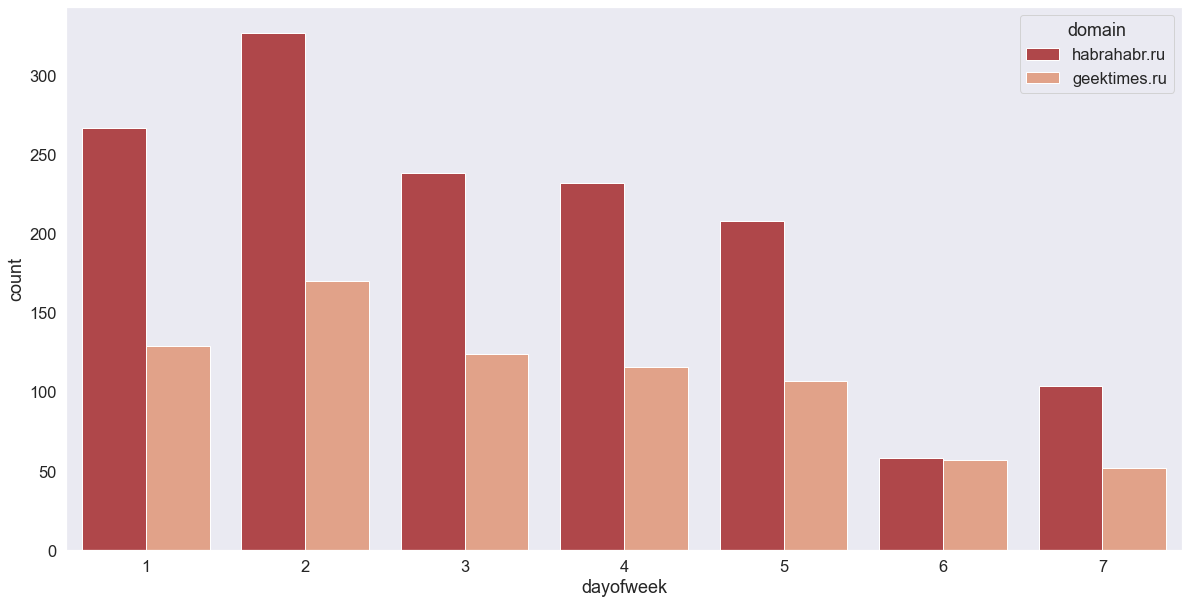

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x='dayofweek', hue = 'domain', data=df1)

'almost the same number on saturdays'

## 3. When is the best time to publish an article?

* Articles published at 12 noon get the most views
* The maximum number of comments on gyktimes was scored by an article published at 9 p.m.
* On Habré, daily articles are commented more often than evening articles

'верно'

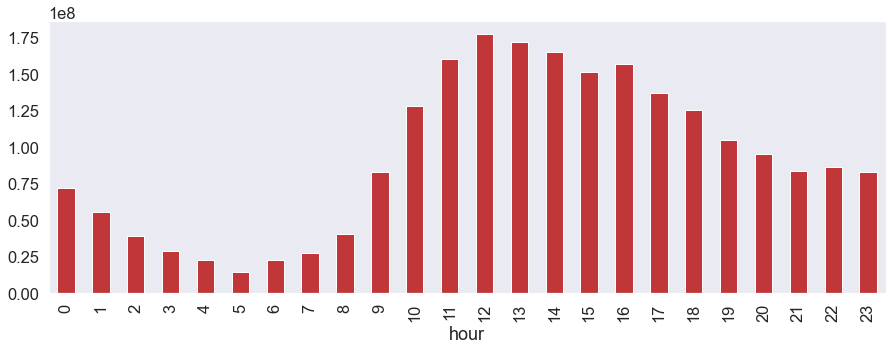

In [ ]:
df.groupby(['hour']).views.sum().plot(kind = 'bar', figsize = (15,5))
'True'

'неверно'

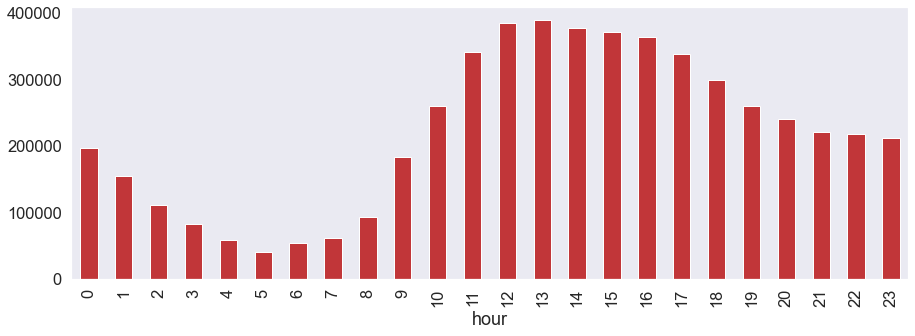

In [ ]:
df.groupby(['hour']).comments.sum().plot(kind = 'bar', figsize = (15,5))

'неверно'

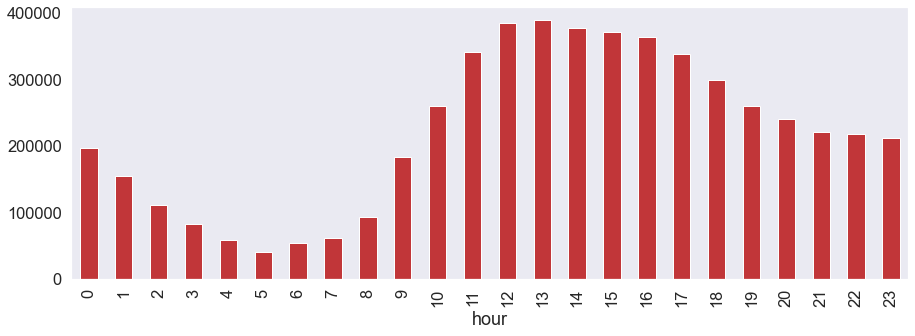

In [ ]:
df.groupby(['hour']).comments.sum().plot(kind = 'bar', figsize = (15,5))

In [ ]:
df3=df[(df['hour']>= 9) & (df['hour']<= 18)]
daypublications_df=df3.groupby('domain')[['comments']].sum()

df4=df[(df['hour']<9) | (df['hour']> 18)]
nightpublications_df=df4.groupby('domain')[['comments']].sum()

trace0 = go.Bar(
    x=daypublications_df.index,
    y=daypublications_df.comments,
    name='day'
)

trace1 = go.Bar(
    x=nightpublications_df.index,
    y=nightpublications_df.comments,
    name='night'
)
data = [trace0, trace1]
fig = go.Figure(data=data)
iplot(fig, show_link=False)


'верно'

## 4. Which of the top 20 authors are most often downvoted?

'@alizar'

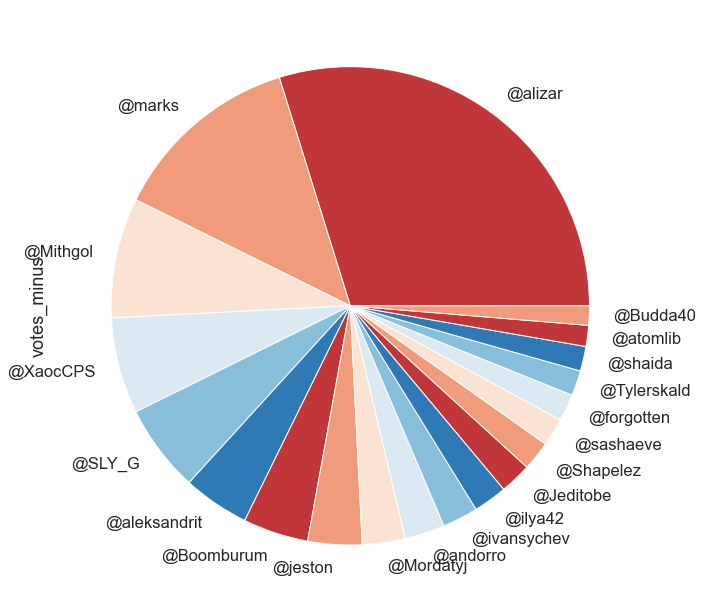

In [ ]:
df.groupby('author').votes_minus.sum().sort_values(ascending = False)[:20].plot(kind='pie', figsize=(11,11))
'@alizar'

## 5. Comparing Saturdays and Mondays

In [ ]:
df3=df[(df['hour']>= 9) & (df['hour']<= 18)]
daypublications_df=df3.groupby('dayofweek')[['post_id']].sum()

df4=df[(df['hour']<9) | (df['hour']> 18)]
nightpublications_df=df4.groupby('dayofweek')[['post_id']].sum()

trace0 = go.Bar(
    x=daypublications_df.index,
    y=daypublications_df.post_id,
    name='day'
)

trace1 = go.Bar(
    x=nightpublications_df.index,
    y=nightpublications_df.post_id,
    name='night'
)
data = [trace0, trace1]
fig = go.Figure(data=data)
iplot(fig, show_link=False)


'неверно'